In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from preprocess_text_sourcecode import *

In [3]:
scores = pd.read_csv("../Data_scraping/data_score.txt", header = None)
desc = pd.read_csv("../Data_scraping/data_desc.txt", header = None, sep = '\n')

In [4]:
df = pd.merge(scores, desc, left_index = True, right_index = True)

In [5]:
df.columns = ['score', 'description']

In [6]:
pd.set_option('display.max_colwidth', None)
df.head()

,score,description
0,7.0,"Mình đặt ""Bánh đa trộn chả cá"", mình thấy ăn rất ngon, rất hợp khẩu vị của mình. Nhưng quán làm nước dùng hơi mặn, còn bánh đa quán cắt bé quá, phải dùng thìa mới ăn đc."
1,10.0,Bún ngon rất hợp lý giá tiền phục vụ rất tốt quán ăn sạch sẽ sẽ ủng hộ tiếp ạ
2,9.8,Bánh mì ở đây rất ngon. Vị béo ngậy của pate tan dần trong miệng thật tuyệt. Uống cùng với trà sữa matcha thì k gì bằng 😋😋😋 mình sẽ thường xuyên ủng hộ quán
3,9.6,"Mình order khoai dẻo truyền thống và ngũ sắc. Chè rất ngon, khoai dẻo mềm và thơm. Mình từng ăn khoai dẻo ở nhiều quán online khác nhưng rất dai và ko thơm như ở đây. Ngũ sắc vừa miệng, có trân châu dai dai, phô mai cũng rất thơm béo. Sẽ ủng hộ tiếp 😍"
4,9.0,Cơm gà khá ổn áp cơm ngon như ở nhà căm thịt gà chắc và dai ngọt thịt nước canh ăn kèm ngon nhưng ko có rau nhiều phục vụ khá ok


In [7]:
df.tail()

,score,description
5637,8.2,"Nhà sàn mái lá, cây cối xanh tươi thoáng mát, các bạn có dịp qua Bắc Kạn hãy đến thưởng thức nhé, món ăn chủ yếu về dê, món tái cực ngon"
5638,10.0,Rất ngon ý
5639,8.2,<3 <3 Tuyet voi
5640,9.0,"Bánh đẹp và rất ngon, ship hàng nhanh"
5641,8.0,Pizza có ngon ko nhỉ? muốn mua ăn thử xem ở đây xem có ngon ko?


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5642 entries, 0 to 5641
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   score        5642 non-null   float64
 1   description  5642 non-null   object 
dtypes: float64(1), object(1)
memory usage: 132.2+ KB


## 1. Missing data 

Không có dữ liệu thiếu (null) trong dataset.

## 2. Find duplicate rows

Các dòng giống hệt nhận xét + điểm số khả năng cao là review rác, quảng cáo, spam, v.v. <br/>
<b>Giải quyết</b>: nếu số dòng duplicate chiếm < 5% tổng số dòng, loại bỏ những dòng này.

In [9]:
df[df.duplicated()]

,score,description
264,9.8,NGON
403,10.0,"Mình cần pass voucher: 10 triệu sale off 50% còn 5 triệu - HSD 31.12.2021 sử dụng tại The Dome, Dynasty House, Jumbo Seafood, Ac Lac Do Brazil, Marina Club Vung Tau Ai cần liên hệ mình Năm Thành : 0938249555 (có Viber/Zalo)"
405,10.0,"Mình cần pass voucher: 10 triệu sale off 50% còn 5 triệu - HSD 31.12.2021 sử dụng tại The Dome, Dynasty House, Jumbo Seafood, Ac Lac Do Brazil, Marina Club Vung Tau Ai cần liên hệ mình Năm Thành : 0938249555 (có Viber/Zalo)"
406,10.0,"Mình cần pass voucher: 10 triệu sale off 50% còn 5 triệu - HSD 31.12.2021 sử dụng tại The Dome, Dynasty House, Jumbo Seafood, Ac Lac Do Brazil, Marina Club Vung Tau Ai cần liên hệ mình Năm Thành : 0938249555 (có Viber/Zalo)"
410,10.0,"Mình cần pass voucher: 10 triệu sale off 50% còn 5 triệu - HSD 31.12.2021 sử dụng tại The Dome, Dynasty House, Jumbo Seafood, Ac Lac Do Brazil, Marina Club Vung Tau Ai cần liên hệ mình Năm Thành : 0938249555 (có Viber/Zalo)"
...,...,...
2590,10.0,Yummy
2759,10.0,"Món ngon, view đẹp, nhân viên thân thiện, không gian thoải mái."
5339,10.0,Good
5520,10.0,Ngon


In [10]:
df = df[df.duplicated() == False]

In [11]:
df.head(5)

,score,description
0,7.0,"Mình đặt ""Bánh đa trộn chả cá"", mình thấy ăn rất ngon, rất hợp khẩu vị của mình. Nhưng quán làm nước dùng hơi mặn, còn bánh đa quán cắt bé quá, phải dùng thìa mới ăn đc."
1,10.0,Bún ngon rất hợp lý giá tiền phục vụ rất tốt quán ăn sạch sẽ sẽ ủng hộ tiếp ạ
2,9.8,Bánh mì ở đây rất ngon. Vị béo ngậy của pate tan dần trong miệng thật tuyệt. Uống cùng với trà sữa matcha thì k gì bằng 😋😋😋 mình sẽ thường xuyên ủng hộ quán
3,9.6,"Mình order khoai dẻo truyền thống và ngũ sắc. Chè rất ngon, khoai dẻo mềm và thơm. Mình từng ăn khoai dẻo ở nhiều quán online khác nhưng rất dai và ko thơm như ở đây. Ngũ sắc vừa miệng, có trân châu dai dai, phô mai cũng rất thơm béo. Sẽ ủng hộ tiếp 😍"
4,9.0,Cơm gà khá ổn áp cơm ngon như ở nhà căm thịt gà chắc và dai ngọt thịt nước canh ăn kèm ngon nhưng ko có rau nhiều phục vụ khá ok


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5564 entries, 0 to 5641
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   score        5564 non-null   float64
 1   description  5564 non-null   object 
dtypes: float64(1), object(1)
memory usage: 130.4+ KB


## 3. Univariate analysis

### 3.1. Score

<b>Nhận xét</b>: Dữ liệu điểm số bị lệch trái. Nhóm điểm từ 9-10 cao hơn rất nhiều so với các nhóm điểm khác, dẫn tới dữ liệu mất cân bằng. Sẽ cần phải cân bằng lại dữ liệu bằng oversampling hoặc undersampling.

<AxesSubplot:xlabel='score', ylabel='Count'>

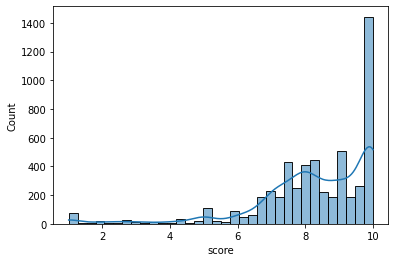

In [13]:
sns.histplot(df['score'], kde = True)

In [14]:
score_bins = pd.cut(df['score'], bins = list(range(11)))
score_bins.value_counts(sort=False)

(0, 1]       76
(1, 2]       32
(2, 3]       56
(3, 4]       37
(4, 5]      162
(5, 6]      132
(6, 7]      531
(7, 8]     1279
(8, 9]     1149
(9, 10]    2110
Name: score, dtype: int64

In [15]:
df['score'].describe()

count    5564.000000
mean        8.252408
std         1.793294
min         1.000000
25%         7.400000
50%         8.600000
75%         9.800000
max        10.000000
Name: score, dtype: float64

### 3.2. Review description

<b><u> Xử lý dữ liệu text </u></b>

In [16]:
# Tokenize Vietnamese strings

df['description_token'] = ""

for index, row in df.iterrows():
    review = row['description']
    review = pre_processing(review)
    token = tokenize(review)
    df.at[index, 'description_token'] = token

In [17]:
df.sample()

,score,description,description_token
1436,8.2,"Đạo Quán - 385*** NĐ 1 tô phở ấm nóng ngọt thơm là những gì mình cần vào 1 buổi sáng mùa đông lạnh lẽo này ))) Đùa chứ nhìn tô phở thơm phức đẹp mắt được bê ra là thấy no con mắt rồi. Mình gọi phở tái, thịt được thái vừa, ngọt, nước dùng cũng ngon ngọt vị, thêm 1 chút chanh chua chua và 1 lát ớt cay cay siêu phê! Nhớ dặn không cho mì chính nha, mình có thói quen đi ăn phở đều dặn như thế để đỡ bị say ))) Không gian quán thoáng mát, sạch sẽ. Phục vụ cũng rất chu đáo và nhanh nữa.",đạo quán star star star nđ tô phở ấm nóng ngọt thơm là những gì mình cần vào buổi sáng mùa đông lạnh_lẽo này đùa chứ nhìn tô phở thơm_phức đẹp_mắt được bê ra là thấy no con mắt rồi mình gọi phở_tái thịt được thái vừa ngọt nước dùng cũng ngon_ngọt vị thêm chút chanh_chua chua và lát ớt cay cay siêu phê nhớ dặn không cho mì_chính nha mình có thói_quen đi ăn phở đều dặn như_thế để đỡ bị say không_gian quán thoáng mát sạch_sẽ phục_vụ cũng rất chu_đáo và nhanh nữa tích_cực tích_cực tích_cực tích_cực tích_cực tích_cực tích_cực


In [18]:
# Use TF-IDF to choose frequently appeared words/bigrams, eliminate words and bigrams with occurrence > 80%

from sklearn.feature_extraction.text import TfidfVectorizer

def create_word_vecs(array):
    vectorizer = TfidfVectorizer(max_features = 300,
                             max_df = 0.8,
                             encoding='utf-8', 
                             lowercase = False)

    vecs = vectorizer.fit_transform(array)
    feature_names = vectorizer.get_feature_names()
    dense = vecs.todense()
    lst1 = dense.tolist()
    word_freqs = pd.DataFrame(lst1, columns=feature_names)
    return word_freqs.T.sum(axis=1)

In [19]:
df_vec = create_word_vecs(df['description_token'])

C:\Users\Jenny\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
df_vec.sort_values(ascending=False)

ăn      459.797372
quán    438.633943
ngon    398.659975
mình    372.857855
có      347.501583
           ...    
hà       29.567218
vài      29.332391
toàn     28.615548
nhớ      28.359912
nhau     28.147570
Length: 300, dtype: float64

<b><u> Visualize with word cloud </u></b>

In [21]:
from wordcloud import WordCloud

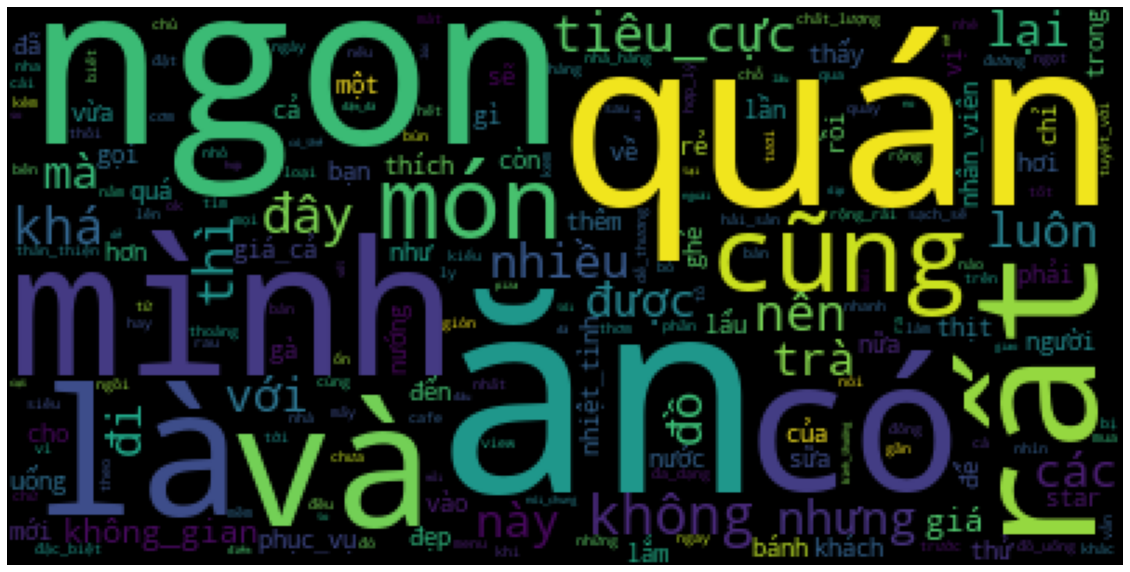

In [22]:
wc = WordCloud().generate_from_frequencies(df_vec)
plt.figure(figsize = (20,20))
plt.imshow(wc)
plt.axis('off')
plt.show()

<b>Nhận xét</b>: 
* Review các quán ăn nên có nhiều từ ngữ chung về chủ đề ăn uống: "quán", "bánh", "trà", "món"
* Các điểm nhận xét về quán: "giá cả", "chất lượng", "không gian", "nhân viên", "nhiệt tình"
* Từ "ngon" xuất hiện rất nhiều, điều này khá hợp lý với việc đa phần điểm số cao (9-10 điểm).

## 4. Bivariate analysis

<b>Word cloud cho từng nhóm:</b>
* Positive: score > 8
* Neutral: 8 >= score >= 5
* Negative: score < 5

In [23]:
df_pos = df[df['score'] > 8]
df_neu = df[(df['score'] >= 5) & (df['score'] <= 8)]
df_neg = df[df['score'] < 5]

In [24]:
print('Number of positive reviews:', len(df_pos))
print('Number of neutral reviews:', len(df_neu))
print('Number of negative reviews:', len(df_neg))

Number of positive reviews: 3259
Number of neutral reviews: 2041
Number of negative reviews: 264


In [25]:
pos_vec = create_word_vecs(df_pos['description_token'])
neu_vec = create_word_vecs(df_neu['description_token'])
neg_vec = create_word_vecs(df_neg['description_token'])

### Positive reviews:
Từ "ngon" xuất hiện rất nhiều, phù hợp với các nhận xét điểm cao.

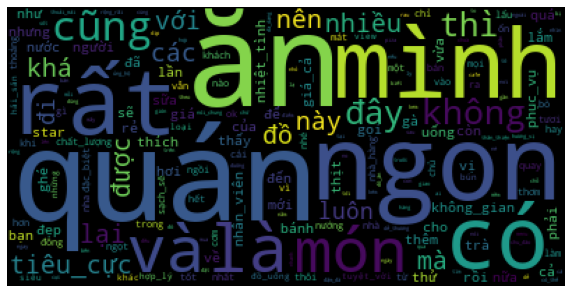

In [26]:
wc = WordCloud().generate_from_frequencies(pos_vec)
plt.figure(figsize = (10,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

### Neutral reviews:
Từ "ngon" vẫn xuất hiện nhiều, nhưng cũng có từ ngữ ám chỉ thái độ trung bình/kém: "cũng", "không", "nhưng", "khá"

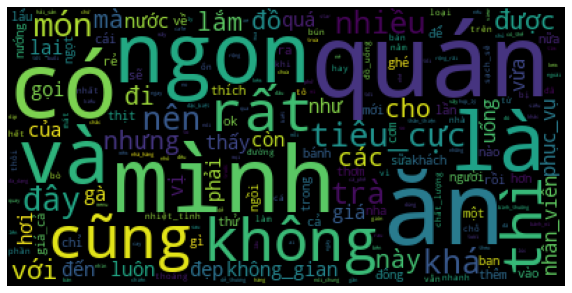

In [27]:
wc = WordCloud().generate_from_frequencies(neu_vec)
plt.figure(figsize = (10,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

### Negative reviews:

Từ "không" và "tiêu cực" xuất hiện nhiều, từ "ngon" vẫn có tần xuất cao. Nghi ngờ có mislabelled data.

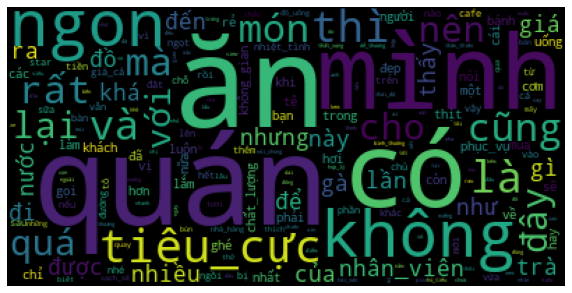

In [28]:
wc = WordCloud().generate_from_frequencies(neg_vec)
plt.figure(figsize = (10,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

# Nhận xét sau khi EDA:

1. Cần phải cân bằng lại tập dữ liệu để có số lượng cân bằng giữa các nhóm positive/neutral/negative.

2. Có một vài review nội dung khá tích cực nhưng điểm lại thấp. Chứng tỏ trong tập dữ liệu này có mislabelled data, sẽ cần phải gán nhãn lại để đảm bảo chất lượng mô hình.

In [29]:
df_neg.sample(5)

,score,description,description_token
1495,4.8,Quán ăn quá tệ. Gọi cả con gà 150 k. cho được dăm miếng + một cái đĩa để gà bị ai đó ăn dở ngoe ngoét cả ra. Ghép tất cả lại thì mỗi miếng của một con khác nhau và không đủ 1 con gà.,quán ăn quá tệ gọi cả con gà k cho được dăm miếng một cái đĩa để gà bị ai đó ăn_dở ngoe ngoét cả ra ghép tất_cả lại thì mỗi miếng của một con khác nhau và không đủ con gà tiêu_cực tích_cực
3646,1.0,"Chất lượng kém, thái độ nhân viên hách dịch. Nên tẩy chay quán.",chất_lượng kém thái_độ nhân_viên hách_dịch nên tẩy_chay quán tích_cực
984,1.0,"Giá cả thì khá trung bình, nhưng đồ ăn ko tươi, càng cù kì đông lạnh ăn cứg khô thịt có mùi tanh ... nhân viên ko niềm nở .sẽ ko bao giờ quay lại.................................................................................................",giá_cả thì khá trung_bình nhưng đồ ăn tiêu_cực càng cù kì đông_lạnh ăn cứg khô thịt có mùi tanh nhân_viên không niềm nở sẽ không bao_giờ quay lại
3345,4.6,Quán cafe xịn sò bậc nhất ở Sa Đéc,quán cafe xịn sò bậc nhất ở sa_đéc tích_cực
5240,4.6,"Đi chơi qua nên vào ngồi luôn :3 vị trí và không gian đẹp, rộng rãi. Ngồi ngoài trời có thể hơi nóng/lạnh quá nhưng mà thoáng với tiện ngắm biệt thự. Mình có vào wc ở đây, không thấy có vấn đề gì cả? Đồ uống thì ngon khỏi nói :v với giá đấy thì ngon là chuẩn rồi. Menu đa dạng có cả kem, cà phê các thứ mà thèm iceblend nên không gọi kem. Có đồ ăn mà mình ăn ở quán khác rồi nên không thử được nữa, nhưng nhòm của bàn khác có vẻ hấp dẫn )) Phục vụ hơi lâu xíu. Nếu đi qua vẫn có thể quay lại ngồi ))",đi chơi qua nên vào ngồi luôn vị_trí và không_gian đẹp rộng_rãi ngồi ngoài_trời có_thể hơi nóng lạnh quá nhưng mà thoáng với tiện ngắm biệt_thự mình có vào wc ở đây không thấy có vấn_đề gì cả đồ_uống thì ngon khỏi nói tích_cực với giá đấy thì ngon là chuẩn rồi menu đa_dạng có cả kem cà_phê các thứ mà thèm iceblend nên không gọi kem có đồ_ăn mà mình ăn ở quán khác rồi nên tiêu_cực thử nữa nhưng nhòm của bàn khác có_vẻ hấp_dẫn phục_vụ hơi lâu xíu nếu đi qua vẫn có_thể quay lại ngồi tích_cực tích_cực tích_cực tích_cực tích_cực tích_cực tích_cực


In [30]:
#df.to_csv("Cleaned_dataframe.csv", encoding = 'utf-8')